In [74]:
import numpy as np
import tensorflow as tf

from matplotlib.pyplot import imshow

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

from PIL import Image

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

11493376/11490434 [==============================] - 0s 0us/step


In [66]:
def conv_image(raw):
    new_r = raw * 255

    r = np.zeros((28, 28))

    for i in range(0, 28):
        for j in range(0, 28):
            r[i][j] = new_r[i][j]

    print('a', len(r))
    # print(x_train[0])
    print('b', len(r[14]))

    img = Image.fromarray(r)
    return img
img = conv_image(x_train[0])
img.show()

a 28
b 28


In [79]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2563 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1090 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0788 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0492 - accuracy: 0.9840
313/313 - 1s - loss: 0.0745 - accuracy: 0.9776


[0.07450373470783234, 0.9775999784469604]

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [81]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [82]:
predictions = probability_model.predict(x_test)

In [84]:
print(y_test)

[7 2 1 ... 4 5 6]


In [92]:
def display_img(i):
    img = conv_image(x_test[i])
    print(predictions[i])
    print(np.max(predictions[i]))
    print(np.where(predictions[i] == max(predictions[i])))
    imshow(img)

a 28
b 28
[0.08806789 0.08806793 0.08814389 0.08806783 0.10652748 0.09568255
 0.1805121  0.08806783 0.08807054 0.08879201]
0.1805121
(array([6], dtype=int64),)


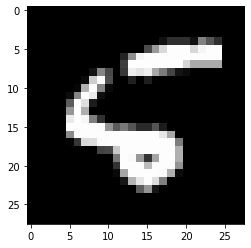

In [93]:
display_img(8)

In [90]:
f = []
for i in range(len(x_test)):
    res = np.where(predictions[i] == max(predictions[i]))
    res = res[0][0]
    if res != y_test[i]:
        f.append(i)

print(f)

[8, 151, 233, 247, 321, 340, 359, 445, 495, 582, 613, 646, 684, 691, 720, 740, 846, 947, 951, 956, 965, 1014, 1032, 1039, 1112, 1156, 1182, 1194, 1226, 1232, 1242, 1247, 1260, 1272, 1319, 1325, 1328, 1331, 1378, 1393, 1414, 1425, 1522, 1530, 1549, 1553, 1609, 1621, 1671, 1681, 1751, 1754, 1790, 1850, 1878, 1899, 1901, 1952, 2004, 2016, 2024, 2035, 2040, 2044, 2052, 2053, 2098, 2109, 2118, 2130, 2135, 2272, 2293, 2369, 2387, 2395, 2406, 2422, 2433, 2462, 2488, 2597, 2607, 2631, 2654, 2720, 2721, 2743, 2810, 2863, 2927, 2939, 2961, 2990, 3012, 3030, 3060, 3062, 3115, 3117, 3289, 3475, 3503, 3520, 3533, 3549, 3558, 3567, 3597, 3629, 3662, 3702, 3718, 3727, 3751, 3776, 3780, 3811, 3838, 3869, 3893, 3906, 3941, 3951, 3968, 3976, 3985, 3988, 4065, 4075, 4078, 4176, 4177, 4199, 4248, 4271, 4289, 4355, 4360, 4374, 4400, 4419, 4497, 4534, 4536, 4551, 4567, 4571, 4601, 4639, 4699, 4740, 4751, 4761, 4807, 4823, 4833, 4880, 4956, 5140, 5176, 5183, 5201, 5331, 5495, 5634, 5642, 5676, 5734, 5749, 58